<a href="https://colab.research.google.com/github/Bruce1998a/Libro---Calidad-de-datos-clim-ticos-con-Machine-Learning/blob/main/Secci%C3%B3n_5_4_relleno_por_interpolaci%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Temperatura diaria.csv**

Ejemplo practico para la sección 5.4 del libro Calidad de datos climáticos con Machine Learning

Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Cargar y limpiar datos diarios de temperatura

In [5]:
# Cargar datos (separador típico de Climate Engine)
df = pd.read_csv("Temperatura_diaria.csv", sep=";")

# Normalizar nombres de columnas
df.columns = df.columns.str.lower().str.strip()

# Renombrar columnas explícitamente
df = df.rename(columns={df.columns[0]: "fecha",
                        df.columns[1]: "temp"})

# Convertir fecha (formato día/mes/año)
df["fecha"] = pd.to_datetime(
    df["fecha"],
    dayfirst=True,
    errors="coerce"
)

# Convertir temperatura a numérico
df["temp"] = (
    df["temp"]
    .astype(str)
    .str.replace(",", ".", regex=False)
)

df["temp"] = pd.to_numeric(df["temp"], errors="coerce")

# Ordenar cronológicamente
df = df.sort_values("fecha").reset_index(drop=True)

df.head()


,fecha,temp
0,1982-01-01,25.0410
1,1982-01-02,24.8143
2,1982-01-03,23.9413
3,1982-01-04,23.6070
4,1982-01-05,23.7245


Visualización de la serie diaria original

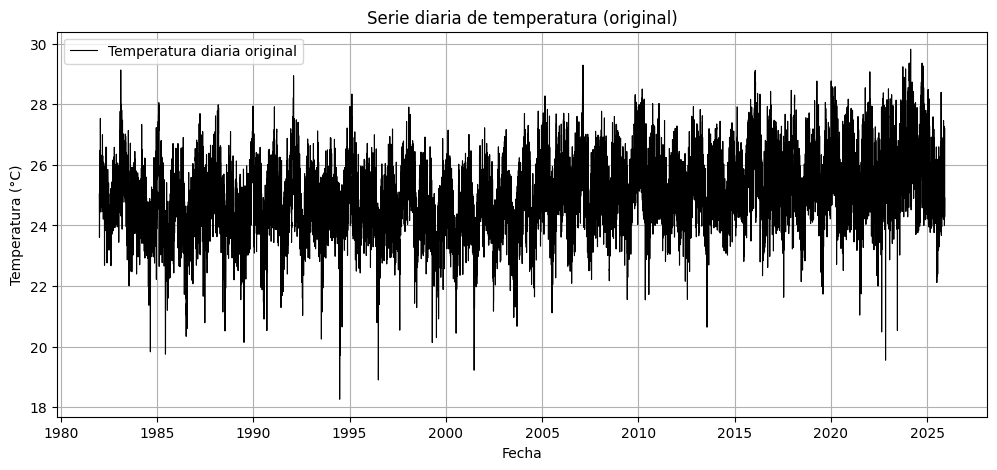

In [6]:
plt.figure(figsize=(12,5))

plt.plot(
    df["fecha"],
    df["temp"],
    color="black",
    linewidth=0.8,
    label="Temperatura diaria original"
)

plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Serie diaria de temperatura (original)")
plt.legend()
plt.grid(True)

plt.show()


Eliminar artificialmente el 20% de los datos

In [7]:
np.random.seed(42)

porcentaje_faltantes = 0.20

indices_faltantes = df.sample(
    frac=porcentaje_faltantes,
    random_state=42
).index

# Guardar la serie original
df["temp_original"] = df["temp"]

# Introducir datos faltantes
df.loc[indices_faltantes, "temp"] = np.nan

print("Datos faltantes tras eliminación artificial:")
print(df["temp"].isna().sum())


Datos faltantes tras eliminación artificial:
3208


Serie diaria con datos faltantes

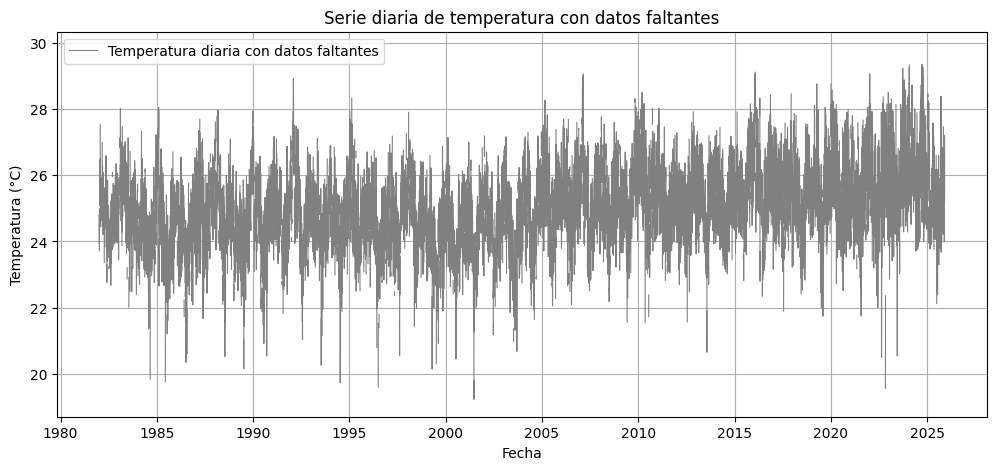

In [8]:
plt.figure(figsize=(12,5))

plt.plot(
    df["fecha"],
    df["temp"],
    color="gray",
    linewidth=0.8,
    label="Temperatura diaria con datos faltantes"
)

plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Serie diaria de temperatura con datos faltantes")
plt.legend()
plt.grid(True)

plt.show()


Relleno por interpolación lineal

In [9]:
# Interpolación lineal en el eje temporal
df["temp_interpolada"] = df["temp"].interpolate(
    method="linear",
    limit_direction="both"
)

print("Datos faltantes tras interpolación:")
print(df["temp_interpolada"].isna().sum())


Datos faltantes tras interpolación:
0


Serie diaria interpolada

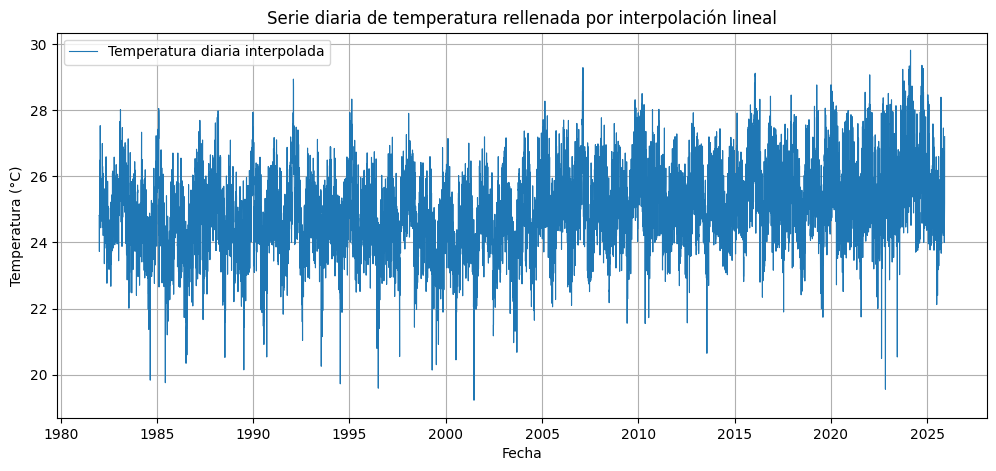

In [10]:
plt.figure(figsize=(12,5))

plt.plot(
    df["fecha"],
    df["temp_interpolada"],
    color="tab:blue",
    linewidth=0.8,
    label="Temperatura diaria interpolada"
)

plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Serie diaria de temperatura rellenada por interpolación lineal")
plt.legend()
plt.grid(True)

plt.show()


Comparación de series completas

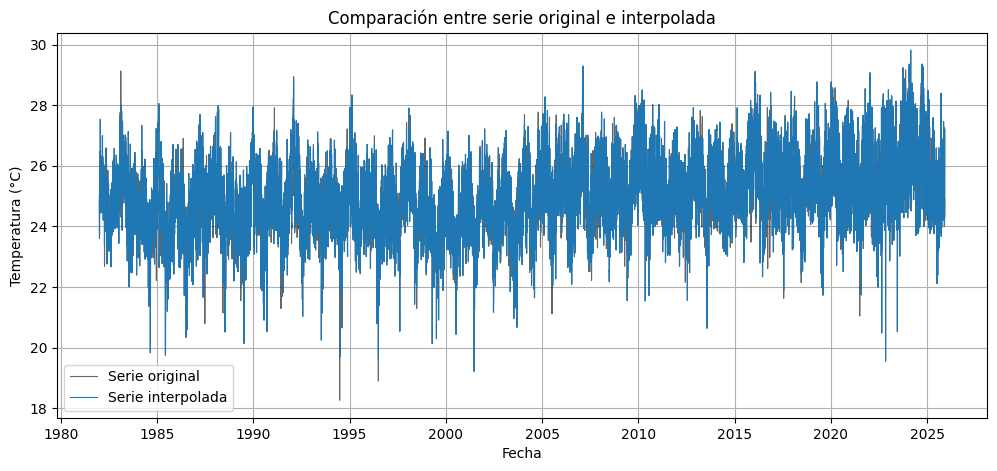

In [11]:
plt.figure(figsize=(12,5))

plt.plot(
    df["fecha"],
    df["temp_original"],
    color="black",
    alpha=0.6,
    linewidth=0.8,
    label="Serie original"
)

plt.plot(
    df["fecha"],
    df["temp_interpolada"],
    color="tab:blue",
    linewidth=0.8,
    label="Serie interpolada"
)

plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Comparación entre serie original e interpolada")
plt.legend()
plt.grid(True)

plt.show()


Gráfica de diferencias (serie completa)

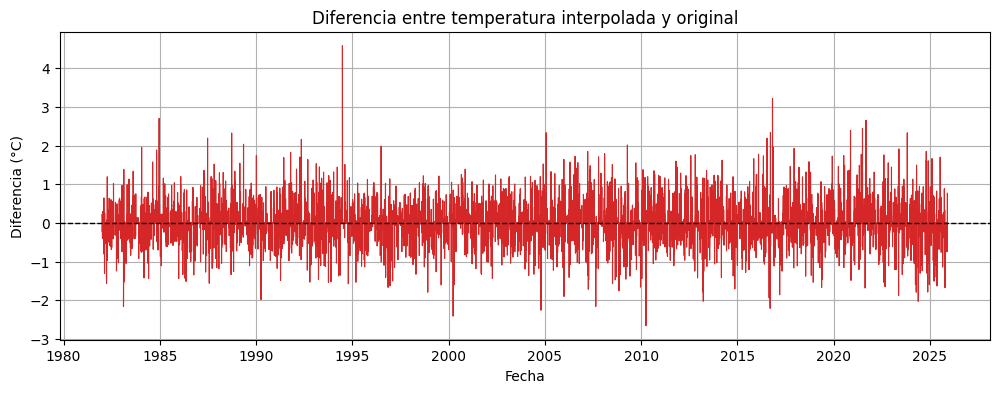

In [12]:
plt.figure(figsize=(12,4))

plt.plot(
    df["fecha"],
    df["temp_interpolada"] - df["temp_original"],
    color="tab:red",
    linewidth=0.8
)

plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.xlabel("Fecha")
plt.ylabel("Diferencia (°C)")
plt.title("Diferencia entre temperatura interpolada y original")
plt.grid(True)

plt.show()


Distribuciones comparadas

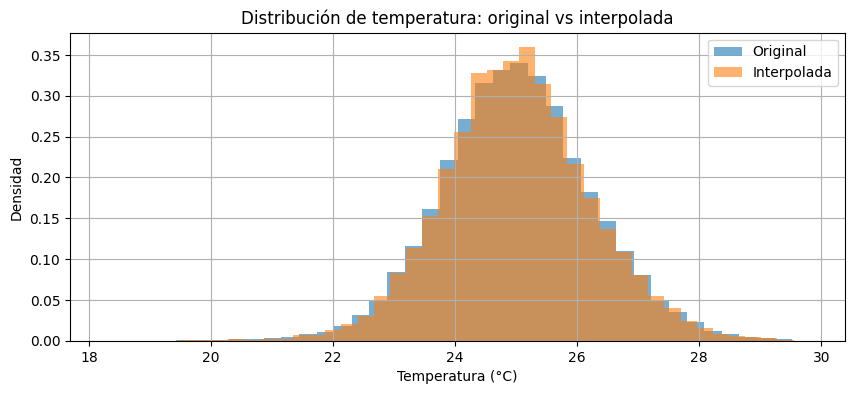

In [13]:
plt.figure(figsize=(10,4))

plt.hist(
    df["temp_original"],
    bins=40,
    alpha=0.6,
    label="Original",
    density=True
)

plt.hist(
    df["temp_interpolada"],
    bins=40,
    alpha=0.6,
    label="Interpolada",
    density=True
)

plt.xlabel("Temperatura (°C)")
plt.ylabel("Densidad")
plt.title("Distribución de temperatura: original vs interpolada")
plt.legend()
plt.grid(True)

plt.show()
